# Figure 2

Pull in data from differential expression screen

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [2]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

Read in microarray validation data.

In [3]:
gs2 = gene_sets.ix[dx_rna.index].fillna(0)

In [4]:
from metaPCNA import *

importing IPython notebook from metaPCNA

In [18]:
sns.set_context('paper',font_scale=1.75)

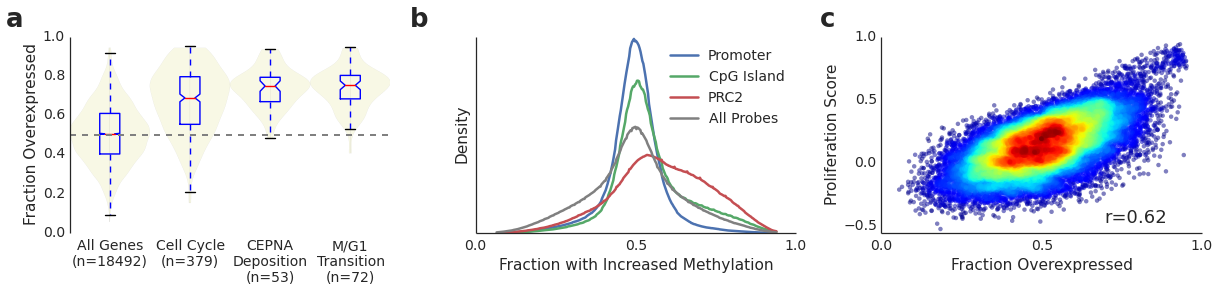

In [23]:
fig, axs = subplots(1,3, figsize=(17,4))
plt.rcParams['font.size'] = 16
ax = axs[0]
v = pd.concat([dx_rna.frac, 
               dx_rna.frac.ix[ti(gs2['REACTOME_CELL_CYCLE']>0)],
               dx_rna.frac.ix[ti(gs2['REACTOME_M_G1_TRANSITION']>0)],
               dx_rna.frac.ix[ti(gs2['REACTOME_DEPOSITION_OF_NEW_CENPA_CONTAINING_NUCLEOSOMES_AT_THE_CENTROMERE']>0)]
               ]).dropna()
v1 = pd.concat([pd.Series('All Genes', dx_rna.frac.index), 
                pd.Series('Cell Cycle', ti(gs2['REACTOME_CELL_CYCLE']>0)),
                pd.Series('M/G1\nTransition', ti(gs2['REACTOME_M_G1_TRANSITION']>0)),
                pd.Series('CEPNA\nDeposition', ti(gs2['REACTOME_DEPOSITION_OF_NEW_CENPA_CONTAINING_NUCLEOSOMES_AT_THE_CENTROMERE']>0))
                ])
v1.name = ''
v.name = 'Fraction Overexpressed'
o = ['All Genes','Cell Cycle','CEPNA\nDeposition',
     'M/G1\nTransition']
violin_plot_pandas(v1, v, order=o, ann=None, ax=ax)
prettify_ax(ax)
ax.spines['bottom'].set_visible(False)
ax.axhline(.5, color='grey', lw=2, ls='--');
fig_1g(axs[1])

ax = axs[2]
plot_regression(dx_rna.frac - .5, pcna_corr, density=True, rad=.03, s=20,
                rasterized=True, ax=ax, line_args={'lw': 0})
ax.set_xticks([-.5, 0, .5])
ax.set_xticklabels([0.0, 0.5, 1.0])
ax.set_yticks([-.5, 0, .5, 1.])
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_xlim(-.5, .5)
ax.set_xlabel('Fraction Overexpressed')
ax.set_ylabel('Proliferation Score')
letters = list(map(chr, range(97, 123)))[:6] 

for i,ax in enumerate(axs):
    ax.text(-0.15, 1.15, letters[i], transform=ax.transAxes,
            fontsize=26, fontweight='bold', va='top', ha='right')

fig.tight_layout()
fig.savefig(FIGDIR + 'dx_fig1.pdf', transparent=True)